---
# <div align="center"><font color='green'> COSC 2673/2793 | Machine Learning  </font></div>
## <div align="center"> <font color='green'> Assignment 1</font></div>
#### <div align="right"> <font color='black'>Name: Saksham Jain <br> Student ID: s3923854</font></div>
---

## Introduction:

This report presents the results of a machine learning project aimed at predicting the life expectancy of a device based on various manufacturing specifications. The project involved the exploration, preparation, and analysis of a dataset containing information on device manufacturing specifications, as well as the development and evaluation of various machine learning models.

The report begins by outlining the project dataset, including its features and target variable. It next shows the exploratory data analysis (EDA) performed on the dataset, which included visualizing the feature distributions and their correlations with the target variable.

After the EDA, the report covers the data preparation process, including the handling of outliers, , splitting into test and training data and scaling of numerical features. Based on the preprocessed data, a K-Fold Cross Validation is used to evaluate the initial performances of various Regression Models.

It then proceeds to describe the various machine learning models used in the project such as Polynomial Multivariate Regression, Regularization, Random Forest Regression, Decision Trees, and Linear Regression while also including their algorithms, hyper-parameters and their tuning.

Finally, the report analyzes the results derived from various Models and provides a detailed analysis of the models' strengths and weaknesses in the form of an Ultimate Judgment. The report concludes with a discussion of the adequacy of the model to perform the task in real-world scenarios and limitations of the approach.

#### To Summarise:

The Report includes-

- Loading the dataset and Performing initial EDA
- Pre-Processing the Data
- Creating a Baseline Model using the Processed Data
- Applying advanced ML Techniques on the Baseline Model to improve performance
- Conclusion


## Initial Python Setup:

We start off with Importing the necessary Python Libraries that will be used in the report as:

- Pandas is used for data manipulation and analysis 
- Matplotlib and Seaborn are used for data visualization
- Scikit-learn is used for machine learning algorithms:
    - train_test_split function from Scikit-learn is used to split the dataset into training and testing sets
    - the MinMaxScaler, RobustScaler and PowerTransformer functions are used for data normalization and transformation
    - The Pipeline function is used to automate the steps of data preprocessing and modeling
    - GridSearchCV function is used for hyperparameter tuning
    - the LinearRegression, Lasso, and PolynomialFeatures, RandomForestRegressor and Decision Tree functions are used for model training and evaluation 
    - the mean_squared_error, r2_score functions and KFold are used to measure the performance of the models.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, PowerTransformer, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import RobustScaler
from sklearn.tree import DecisionTreeRegressor

## Loading the Dataset:

The provided Data_set.csv is loaded using Pandas

In [2]:
df = pd.read_csv('Data_set.csv', delimiter=',')
# loads the dataset into a variable df

The head() method is used to print out the first 10 rows of the dataset and analyze that it has been loaded correctly.

In [3]:
df.head(10)
# prints the first 10 rows of our Dataset

,ID,TARGET_LifeExpectancy,Country,Year,Company_Status,Company_Confidence,Company_device_confidence,Device_confidence,Device_returen,Test_Fail,...,ISO_23,TotalExpenditure,STRD_DTP,Engine_failure,GDP,Product_Quantity,Engine_failure_Prevalence,Leakage_Prevalence,IncomeCompositionOfResources,RD
0,1,67.1,146,2017,0,263,262,264,62,0.01,...,6,8.16,65.0,0.1,654.37,33736494,17.2,17.3,0.479,3.178050
1,2,59.8,146,2016,0,271,278,264,64,0.01,...,58,8.18,62.0,0.1,686.22,327582,17.5,17.5,0.476,3.162278
2,3,57.6,146,2015,0,268,246,290,66,0.01,...,62,8.13,64.0,0.1,707.55,31731688,17.7,17.7,0.470,3.146427
3,4,55.5,146,2014,0,272,248,296,69,0.01,...,67,8.52,67.0,0.1,750.35,3696958,17.9,18.0,0.463,3.130495
4,5,57.7,146,2013,0,275,278,272,71,0.01,...,68,7.87,68.0,0.1,71.16,2978599,18.2,18.2,0.454,3.082207
5,6,58.9,146,2012,0,279,266,292,74,0.01,...,66,9.20,66.0,0.1,619.73,2883167,18.4,18.4,0.448,3.033150
6,7,57.5,146,2011,0,281,270,292,77,0.01,...,63,9.42,63.0,0.1,499.40,284331,18.6,18.7,0.434,2.983287
7,8,57.0,146,2010,0,287,276,298,80,0.03,...,64,8.33,64.0,0.1,418.16,2729431,18.8,18.9,0.433,2.949576
8,9,63.0,146,2009,0,295,276,314,82,0.02,...,63,6.73,63.0,0.1,414.22,26616792,19.0,19.1,0.415,2.898275
9,10,54.1,146,2008,0,295,304,286,84,0.03,...,58,7.43,58.0,0.1,305.27,2589345,19.2,19.3,0.405,2.846050


## Dataset Column Information

`ID`: row index (not an attribute)

`TARGET-LifeExpectancy`: Life Expectancy (months)

`Company`: unique identifier of Country

`Year`: Year

`Company_Status`: Developed or Developing status (0, 1)

`Company_Confidence`: probability of any product from this company lasting between 15 and 60 Months per 1000 sample

`Company_device_confidence`: Probability of the product (this specific product) from this company lasting between 15 and 60 month 
per 1000 samples

`Device_confidence`: Probability of the product (this specific product) from any company lasting between 15 and 60 month per 1000 samples

`Device_returen`: Number of returned devices based on faulty parts per 1000 samples

`Test_Fail`: average of detected faulty products per week during sample inspections

`PercentageExpenditure`: Expenditure on device's quality enhancement as a percentage of gross income from the product (%)

`Engine_Cooling`: Cooling system failure- number of reported cases per 1000 sample

`Gas_Pressure`: Average of gas pressure in section B of the device during routine inspections on selected samples

`Obsolescence`: under-five month obsolescence per 1000 sample

`ISO_23`: Percentage of the product of the company meeting ISO_23 standard(%)

`TotalExpenditure`: General government (of the company's location) expenditure on inspecting the standard of the products, as a percentage of total government expenditure (%)

`STRD_DTP`: percentage of STRD_DTP covered warranty for 1-year (% of covered products from this company)

`Engine_failure`: Factor indicating the engine failure per 1 000 products (0-4 months)

`GDP`: Gross Domestic Product per capita (in USD) where the company is located

`Product_Quantity`: Total product of the company per year

`Engine_failure_Prevalence`: Prevalence of engine failure, in terms of the reduction of recorded failure compared to last year (% )

`Leakage_Prevalence`: Prevalence of Leakage, , in terms of the reduction of recorded failure compared to last year (% )

`IncomeCompositionOfResources` : Human Development Index in terms of income composition of resources (index ranging from 0 to 1)

`RD`: Company's R&D sector


# Exploratory Data Analysis (EDA)

In this phase, we examine and analyze the dataset to identify patterns, relationships, and any other anomalies. This helps us to gain insights into the data and make informed decisions on how to preprocess and model it. The following are some of the key objectives of EDA:

- Gain insights into the dataset using various methods like `shape`, `info()`, `describe()`
- Identify and Visualize the Correlation between the features and the Target Variable using the `corr()` method and through the use of a heatmap as a Correlation Matrix.
- Identify and Visualize any trends/relationships in our data columns using plots such as Histograms, Box Plots and Scatter Plots.

By performing EDA, we can ensure that the data is ready for our model and that the model will then be accurate and robust based on our initial findings from the EDA. 

In this report, we will perform a comprehensive EDA on the dataset and apply various techniques to handle the above objectives.

We start off by using the shape method to calculate the number of rows and columns in our dataset:

In [4]:
df.shape
# Returns the number of rows and columns

(2071, 24)

Based on the column information and the results of the shape method, we observe that there are 2071 rows and 24 columns. 

However, we can observe that the ID column is not an attribute and will not provide any useful information during the Analysis. Therefore, we will proceed to drop its column as:

In [5]:
df = df.drop(['ID'], axis=1)
# Drops the 'ID' column as axis is set to 1

In [6]:
df.info()
# provides information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2071 entries, 0 to 2070
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   TARGET_LifeExpectancy         2071 non-null   float64
 1   Country                       2071 non-null   int64  
 2   Year                          2071 non-null   int64  
 3   Company_Status                2071 non-null   int64  
 4   Company_Confidence            2071 non-null   int64  
 5   Company_device_confidence     2071 non-null   int64  
 6   Device_confidence             2071 non-null   int64  
 7   Device_returen                2071 non-null   int64  
 8   Test_Fail                     2071 non-null   float64
 9   PercentageExpenditure         2071 non-null   float64
 10  Engine_Cooling                2071 non-null   int64  
 11  Gas_Pressure                  2071 non-null   float64
 12  Obsolescence                  2071 non-null   int64  
 13  ISO

The output of the info() method provides us with a summary of how the Dataset is structured. Some conclusions that can be drawn from result of running the above line of code are:

- We now have 23 columns in the Dataset as a result of dropping the 'ID' column.
- Each column has a total of 2071 entries, each of which are Non-Null, which ensures that we have a complete dataset to start working with.
- All the data in our Dataset is either of `Float64` or `Int64` data type.
- TARGET_LifeExpectancy is our Target Variable.

Overall, the data is well prepared for our analysis.

In [7]:
pd.set_option('display.max_columns', 24)
# used to display all the columns as pandas has an initial limit

In [8]:
df.describe(include='all')
# Gives a brief description of the columns, including their count,mean,etc.

,TARGET_LifeExpectancy,Country,Year,Company_Status,Company_Confidence,Company_device_confidence,Device_confidence,Device_returen,Test_Fail,PercentageExpenditure,Engine_Cooling,Gas_Pressure,Obsolescence,ISO_23,TotalExpenditure,STRD_DTP,Engine_failure,GDP,Product_Quantity,Engine_failure_Prevalence,Leakage_Prevalence,IncomeCompositionOfResources,RD
count,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2.071000e+03,2071.000000,2071.000000,2071.000000,2071.000000
mean,69.274505,95.360212,2009.518590,0.185418,162.833897,161.908257,163.759536,33.079672,4.696379,764.540216,2095.747948,37.530662,45.886045,82.727185,5.883858,82.753259,1.632883,7352.742342,1.203741e+07,4.941284,4.977306,0.609551,3.372453
std,9.482281,54.861641,4.614147,0.388730,118.872170,119.442235,118.800292,135.832868,4.205888,2081.880374,9959.531347,19.945437,185.254990,23.188837,2.554965,23.130969,4.782325,15219.978663,6.391797e+07,4.697830,4.785532,0.216532,0.590832
min,37.300000,0.000000,2002.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.010000,0.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.880000,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,63.000000,50.000000,2006.000000,0.000000,74.000000,74.000000,74.000000,0.000000,0.615000,5.848550,0.000000,18.700000,0.000000,77.000000,4.190000,78.000000,0.100000,413.730000,1.274450e+05,1.600000,1.500000,0.463000,3.065942
50%,71.200000,94.000000,2010.000000,0.000000,144.000000,142.000000,144.000000,3.000000,3.830000,69.020425,19.000000,42.000000,4.000000,93.000000,5.640000,93.000000,0.100000,1410.670000,6.522310e+05,3.200000,3.300000,0.655000,3.449638
75%,76.000000,144.000000,2014.000000,0.000000,228.000000,228.000000,230.000000,22.000000,7.840000,430.190047,427.000000,55.900000,27.000000,97.000000,7.430000,97.000000,0.800000,5811.295000,5.371104e+06,7.400000,7.400000,0.769500,3.741657
max,92.700000,192.000000,2017.000000,1.000000,699.000000,704.000000,722.000000,1800.000000,17.870000,19479.911610,212183.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,50.600000,133473.470000,1.293859e+09,27.700000,28.600000,0.948000,4.381780


The `df.describe()` method provides some statistics for the numerical columns in the dataset. 

The TARGET_LifeExpectancy column has a mean value of 69.27, with a minimum value of 37.30 and a maximum value of 92.70. 

The Columns `'Company_Confidence','Company_device_confidence','Device_confidence','Device_returen','Engine_Cooling','Obsolescence','Engine_failure'` have values per 1000 sample, which means that their values should range from 0-1000. Out of the mentioned columns:

- Device_returen
- Obsolescence
- Engine_Cooling

have their Maximum values greater than 1000, which implies the presence of outliers (to be addressed in a later part of the report).

In [9]:
skewed = df.skew()
# display columns with skewness greater than 0.7
skewed_columns = skewed[skewed.abs() > 0.7].index
print(skewed_cols)

NameError: name 'skewed_cols' is not defined

The skew() method is used to determine the column that are mathematically skewed with a value of over 0.7, this will later be confirmed in the next section with the histogram plots of the columns.

### Visual Plots:

The following section of the report is used to further continue our EDA through the use of Visual Plots.

#### Histograms :-

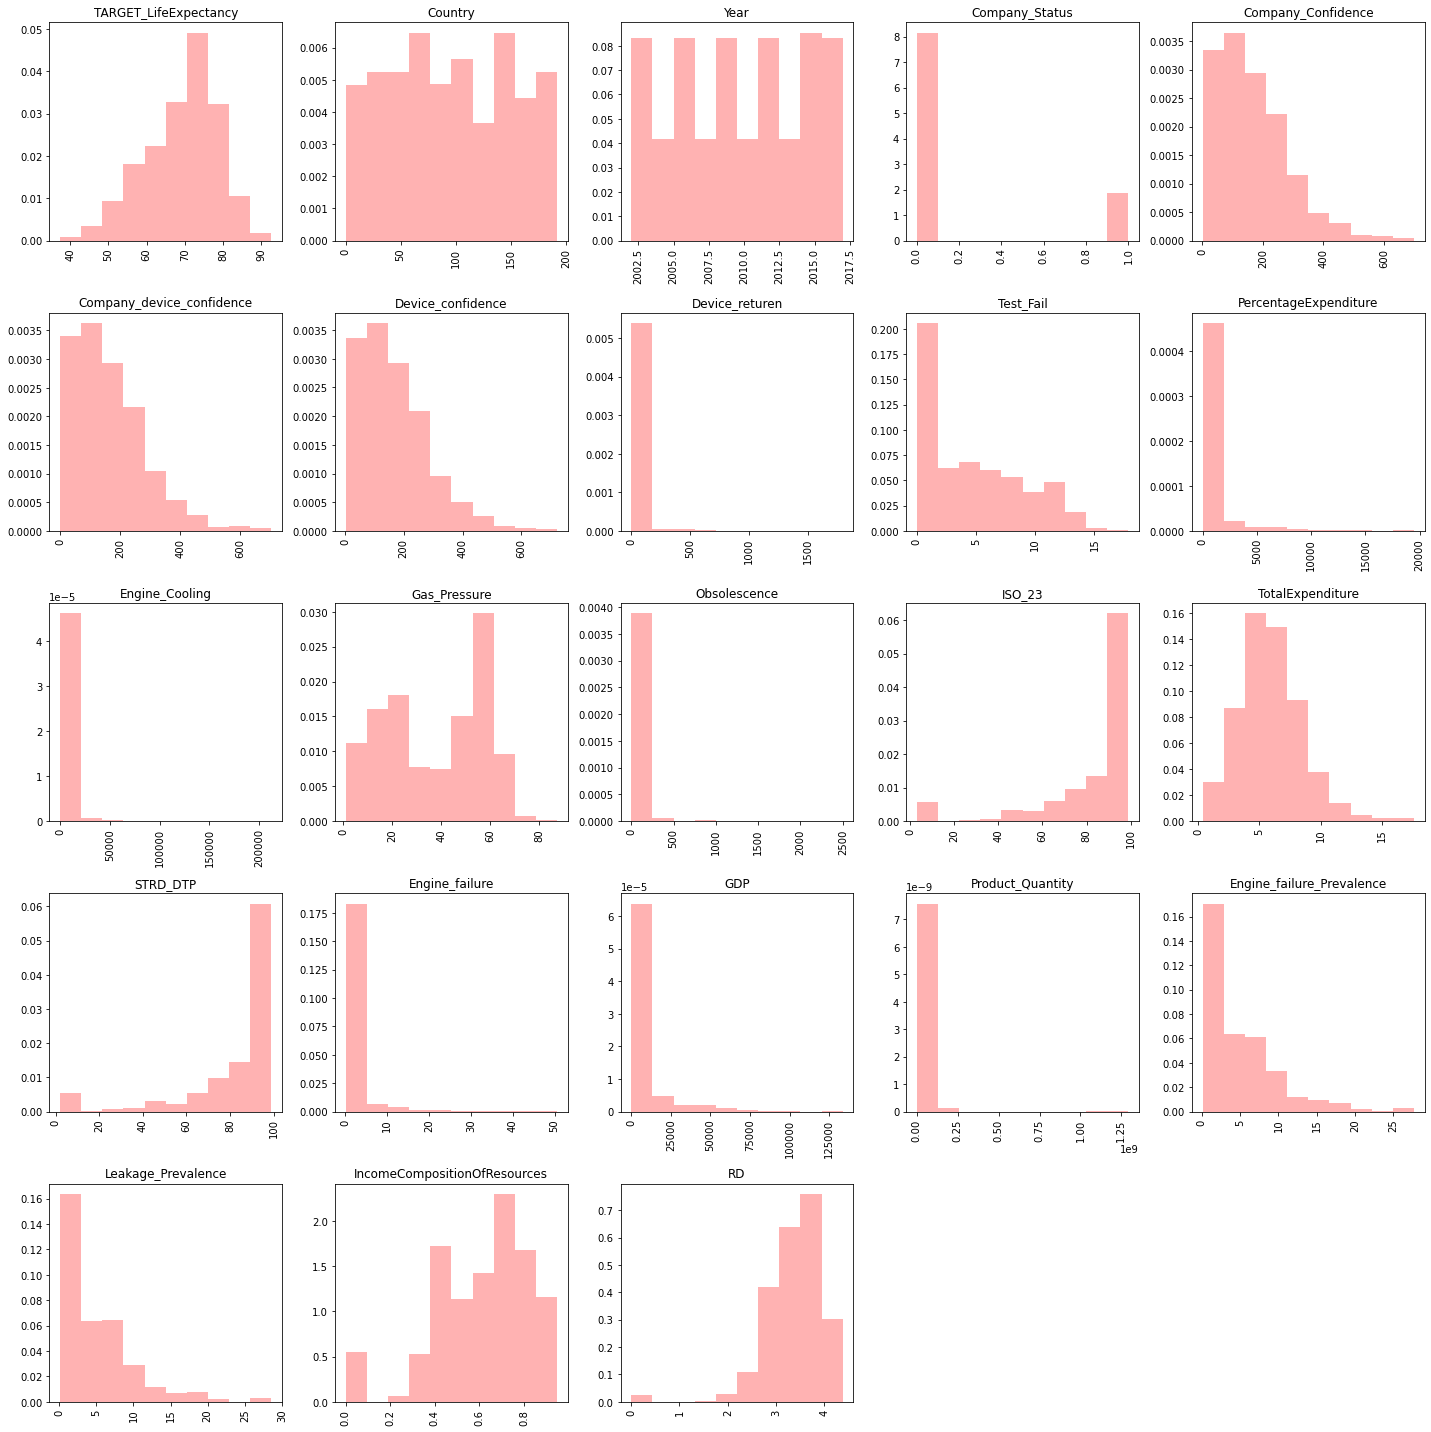

In [10]:
plt.figure(figsize=(20,20))
for i, col in enumerate(df.columns):
#   number of graphs per row and column
    plt.subplot(5,5,i+1)
#   histogram plots 
    plt.hist(df[col], alpha=0.3, color='r', density=True)  
    plt.title(col)
    plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

The following observations can be drawn from the above histograms:

- `['Company_Confidence', 'Company_device_confidence', 'Device_confidence', 'Device_returen', 'PercentageExpenditure', 'Engine_Cooling', 'Obsolescence', 'ISO_23', 'TotalExpenditure', 'STRD_DTP', 'Engine_failure', 'GDP', 'Product_Quantity', 'Engine_failure_Prevalence', 'Leakage_Prevalence', 'IncomeCompositionOfResources', 'RD']` are heavily skewed as confirmed by the skew() method earlier.


- Features `'Country'` and `'Company_Status'` are categorical Variables.


- The TARGET_LifeExpectancy column has a mean value of around 70 , with a minimum value less than 40 and a maximum value of more than 90


- **Most of the features are not normally distributed.**

#### Box Plots :-

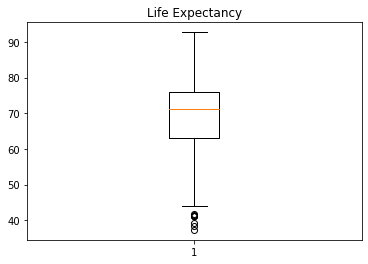

In [11]:
# create boxplot
plt.boxplot(df['TARGET_LifeExpectancy'])
plt.title('Life Expectancy')
plt.show()

From the above box plot of TARGET_LifeExpectancy, several conclusions can be drawn as:

- The distribution of the data is slightly skewed to the right, indicating that there are more devices with a higher life expectancy.

- The median value of TARGET_LifeExpectancy appears to be around 70-72 years.

- There are a few outliers on the lower end of the distribution, indicating that some devices have very low life expectancies compared to the others.

- The interquartile range (IQR) appears to be around 65-55 years.

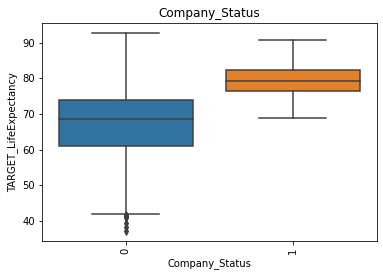

In [12]:
#  creates boxplot of TARGET_LifeExpectancy depending on corresponding Company_Status
ax = sns.boxplot(y='TARGET_LifeExpectancy',x='Company_Status',data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title('Company_Status')
plt.xticks(rotation='vertical')
plt.show()

Observations:

On average, the life expectancy for instances with Company_Status=1 is higher than for instances with Company_Status=0

#### Scatter Plots:-

Scatter plots are a powerful way to:

- Capture any trends/relationships/patterns between the Target Variable and the Features.
- Determine if the relationship is Linear or Non-Linear.
- Any outliers or unusual patterns can also be identified.

Overall, the above information gives us a good idea of the appropriate regression models that can be used on the dataset.

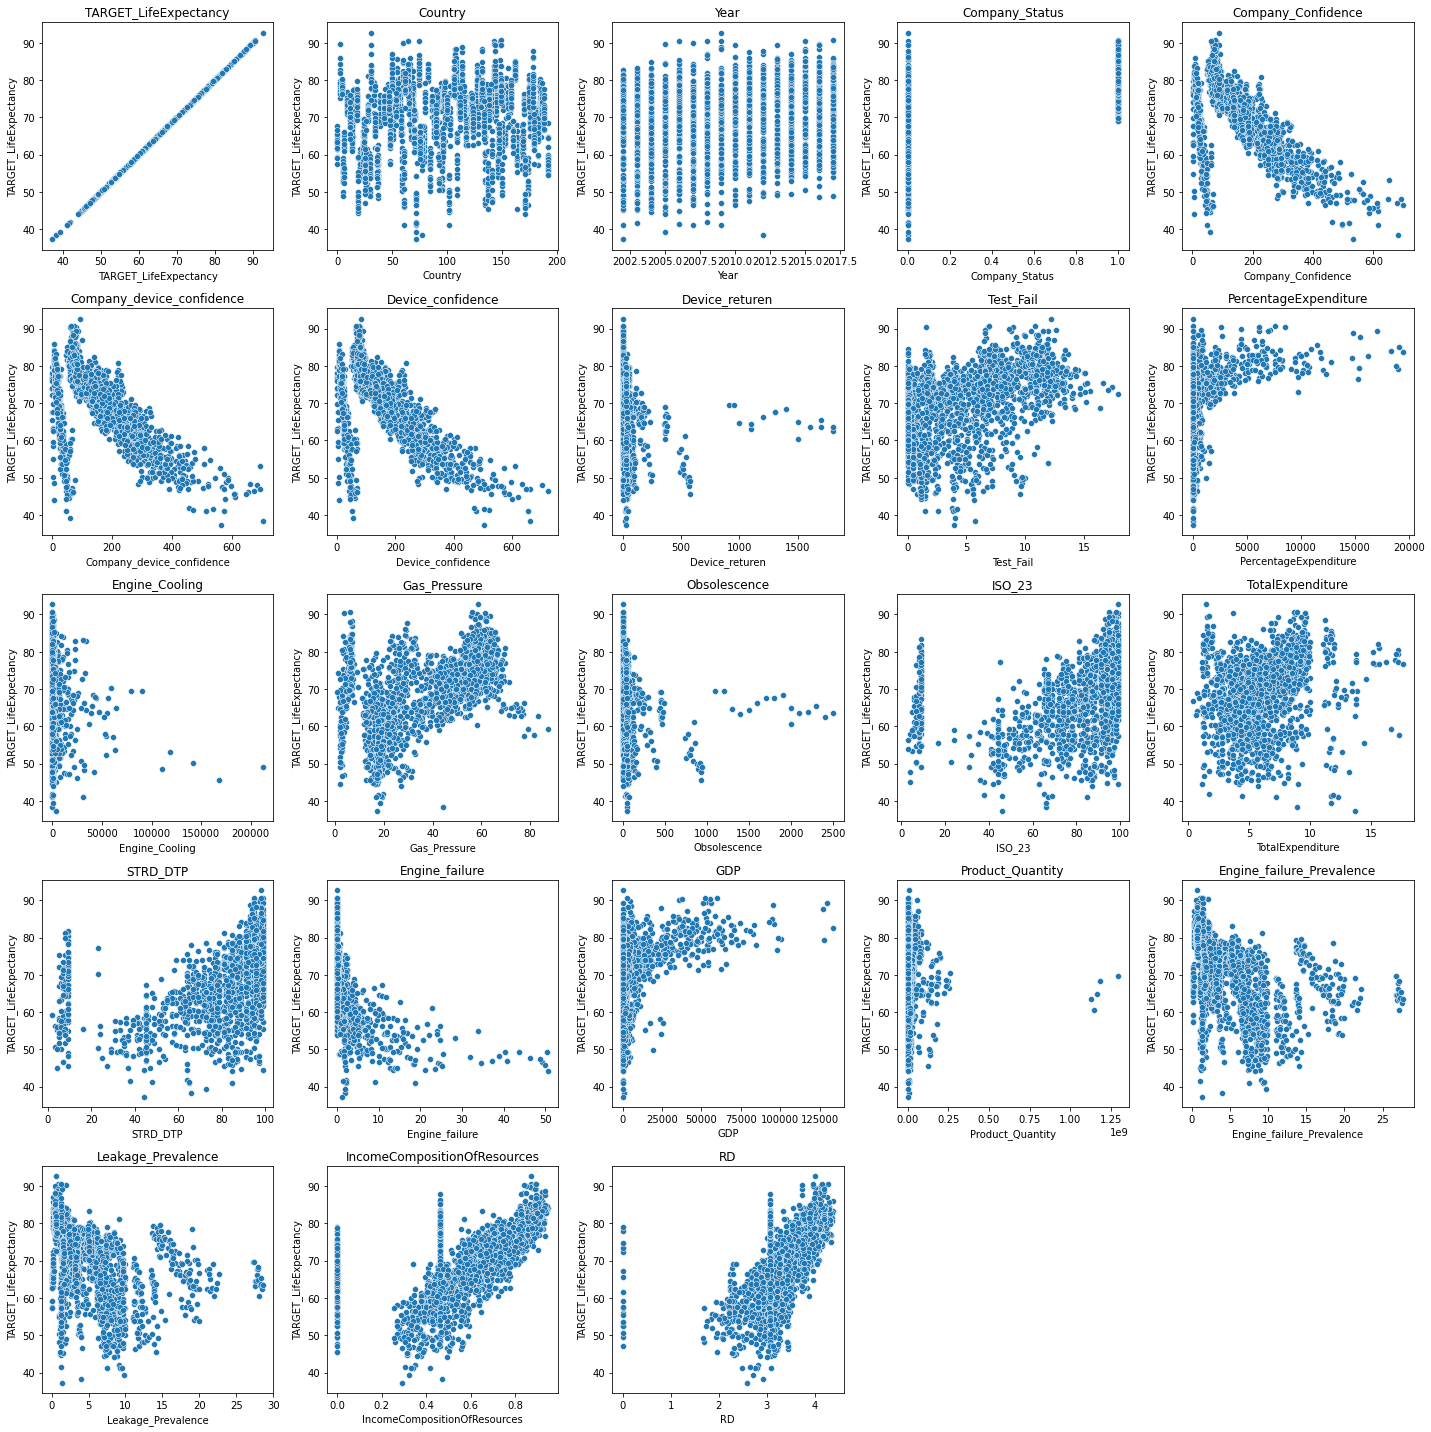

In [13]:
numeric_cols = df.columns
num_plots = len(numeric_cols)
num_rows = num_plots // 5 + 1

fig, axes = plt.subplots(nrows=num_rows, ncols=5, figsize=(20, 20))

# Used to print a 5x5 Scatter plot matrix
for i, col in enumerate(numeric_cols):
    row_idx = i // 5
    col_idx = i % 5
#     Prints Scatter Plots of TARGET_LifeExpectancy in relation to the Columns
    sns.scatterplot(data=df, x=col, y='TARGET_LifeExpectancy', ax=axes[row_idx, col_idx])
    axes[row_idx, col_idx].set_title(col)
#     Used to remove extra empty scatter plots from the end
if num_plots % 5 != 0:
    for i in range(num_plots % 5, 5):
        fig.delaxes(axes[num_rows-1, i])

plt.tight_layout()
plt.show()

The following conclusions can be drawn from the above Scatter Plots:

- `['Company_Confidence', 'Company_device_confidence', 'Device_confidence', 'Test_Fail', 'PercentageExpenditure', 'Gas_Pressure', 'ISO_23', 'TotalExpenditure', 'STRD_DTP', 'Engine_failure', 'GDP', 'Engine_failure_Prevalence', 'Leakage_Prevalence']` have a non-linear relationship with the Target Life Expectancy.

<br>

- `'IncomeCompositionOfResources', 'RD'` have a linear relationship with the Target Life Expectancy

<br>

- `'Device_returen', 'Engine_Cooling', and 'Obsolescence'` contain outliers which might affect our final Predictions.

#### Correlation Heatmap:-

A Correlation Heatmap is a graphical representation of the correlation coefficients between the variables.

A Dark Green (or 1) color represents a Strong Positive Correlation while a Dark Blue (or -1) represents a Strong Negative Correlation.

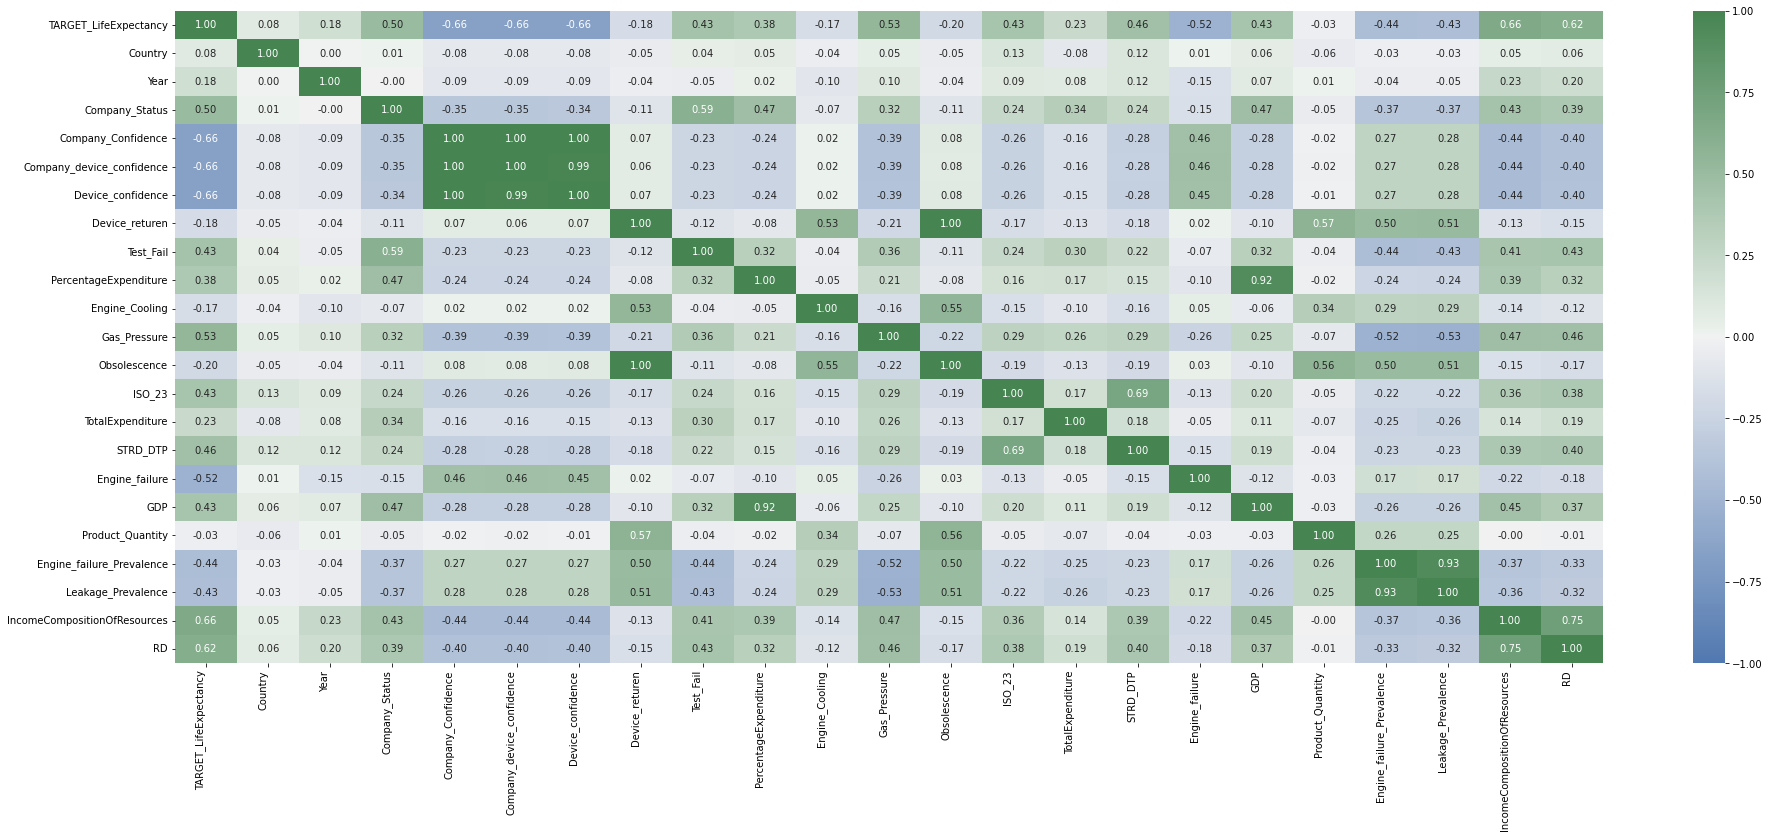

In [14]:
f, ax = plt.subplots(figsize=(32, 12))
corr = df.corr()

# Creates a correlation heatmap based on corr
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    
#     sets colours to Dark Blue and Dark Green
    cmap = sns.diverging_palette(250, 133, 63, as_cmap=True),
    annot=True, fmt='.2f', annot_kws={'fontsize': 10}
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
)
plt.show()

From the above heatmap, we can conclude that:

- `Company_Confidence, Company_device_confidence, and Device_confidence` all have very high positive correlations with one another, suggesting that they are measuring similar concepts.


- `Company_Confidence, Company_device_confidence, Device_confidence, Engine_failure, Gas_Pressure, IncomeCompositionOfResources, RD` have strong correlations with the TARGET_LifeExpectancy.

It appears the the correlation map is not correctly able to identify the non-linear relationships between variables as previously recorded in the Visual Plots.

### Data Splitting and Pre-Processing:

Before any machine learning model can be trained, the data must be pre-processed and split into training and testing sets. This process ensures that the model does not overfit/underfit to the training data and performs well on unseen data. 

In this project, the data is pre-processed in the following ways:


- Outliers are removed using Robust Scaling, which is less sensitive to outliers than traditional scaling methods.


- The dataset is then split into a training set and a testing set using the train_test_split function from scikit-learn.


- The training data is then further pre-processed using MinMaxScaler and Power Transformer, which scales the data and normalizes it, respectively.


- Finally, the pre-processed data is fed into a machine learning pipeline to further continue with the Model Development Process.

By following this flow of pre-processing, data splitting and feeding into a pipeline, we can ensure that the model is trained on a representative sample of the data and has the best chance of generalizing well to new, unseen data.

#### Outlier Handling :-

Outliers are data points that vary considerably from the rest of the data in a dataset. They can be produced by mistakes in measurement or recording, data processing, or other irregularities in the data. Outliers can skew results and lead to inaccurate predictions, which can have a substantial influence on statistical analysis and machine learning models.

We start off by identifying the outliers in our dataset in the columns that have values **per 1000** sample but contain values above 1000:


In [15]:
col_out = ['Company_Confidence','Company_device_confidence','Device_confidence','Device_returen','Engine_Cooling','Obsolescence','Engine_failure']
# prints out the number of values above 1000 in the columns
for out in col_out:
    print(out + ':'+ str(len(df[df[out]>1000])))

Company_Confidence:0
Company_device_confidence:0
Device_confidence:0
Device_returen:13
Engine_Cooling:386
Obsolescence:16
Engine_failure:0


We can see that the above columns `Device_returnen`, `Engine_Cooling` and `Obsolescence` contain outliers.

Since these outliers are present due to measurement errors and not naturally, we will deal with them using Robust Scaling:

In [16]:
# Initialize RobustScaler object
scaler = RobustScaler()
# Fit the scaler to the data and transform the data
df['Engine_Cooling'] = scaler.fit_transform(df[['Engine_Cooling']])
df['Device_returen'] = scaler.fit_transform(df[['Device_returen']])
df['Obsolescence'] = scaler.fit_transform(df[['Obsolescence']])

In [17]:
col_out = ['Company_Confidence','Company_device_confidence','Device_confidence','Device_returen','Engine_Cooling','Obsolescence','Engine_failure']
# prints out the number of values above 1000 in the columns
for out in col_out:
    print(out + ':'+ str(len(df[df[out]>1000])))

Company_Confidence:0
Company_device_confidence:0
Device_confidence:0
Device_returen:0
Engine_Cooling:0
Obsolescence:0
Engine_failure:0


Running the above code confirms that the Dataset is now free from any outliers. We can now proceed to Split the Dataset into Training and Test sets:

#### Splitting the Dataset:


Splitting the dataset is an essential step in building machine learning model.

The dataset is divided into two parts - a training set and a testing set. The training set is used to train the model, while the testing set is used to evaluate the model's performance. 

For this report, we will use the `Random Splitting` method to ensure that there is no bias. The data is split as:

- Train: 80%, Test: 20%

this split is used to balance the need for having enough data to train a model effectively while still having enough data to test the model's performance as our dataset only contains 2071 rows.

In [18]:
# Drop the Target Variable from the list of columns
df_X = df.drop(['TARGET_LifeExpectancy'], axis=1)
# Store the Target Variable in df_Y
df_Y = df['TARGET_LifeExpectancy']

In [19]:
# pd.option_context function with mode.chained_assignment set to None to disable any warnings that may arise from the use of chained assignments in pandas.
with pd.option_context('mode.chained_assignment', None):
    df_X_training, df_X_testing, df_Y_training, df_Y_testing = train_test_split(df_X, df_Y, test_size=0.2, shuffle=True)

The code starts by separating the features from the target variable using the drop method to remove the TARGET_LifeExpectancy column from the original DataFrame and assign it to df_X, while assigning the target variable column to df_Y. 

The `train_test_split` function from the sklearn.model_selection module is then used to split the data into training and testing sets, where the test_size parameter is set to 0.2, indicating that 20% of the data will be used for testing, while 80% will be used for training, as previously mentioned. 

The `shuffle` parameter is set to True, meaning that the data will be shuffled before splitting to ensure that the distribution of data in both sets is representative of the whole dataset. 

Finally, the training and testing sets are assigned to df_X_training, df_X_testing, df_Y_training, and df_Y_testing variables respectively, using tuple unpacking. 

In [20]:
print("Nunber of instances in the original dataset is {}. After spliting Train has {} instances and test has {} instances."
      .format(df.shape[0], df_X_training.shape[0], df_Y_testing.shape[0]))

Nunber of instances in the original dataset is 2071. After spliting Train has 1656 instances and test has 415 instances.


We will now move on to Scaling the data.

#### Feature Scaling:

Data scaling aims to transform the input data to a specific range or distribution to improve the performance of the models. It involves the normalization or standardization of the features in the dataset to ensure that each feature contributes equally to the model training process. 

In this code, two scaling techniques are used, namely the MinMaxScaler and the PowerTransformer. The use of the mentioned Scaling Techniques can be justified as:

MinMaxScaler: 

    Min-max scaling is a data preprocessing technique used to scale features of a dataset between 0 and 1. 
    This scaling technique is particularly useful when dealing with non-normally distributed data because 
    it does not assume a particular distribution. As in our case, we have already concluded from 
    our `Histogram` Plots that most of the features do not have a normal distribution, and 
    hence applying the `MinMaxScaler()` over a `StandardScaler()` is useful.
    
    By rescaling the data to a fixed range, it eliminates the effect of the outliers 
    that might be present in the dataset and reduces the sensitivity of the model to these extreme values. 
    Furthermore, min-max scaling preserves the relative distances between the data points, 
    which can be important for some machine learning algorithms.
    
PowerTransformer:

    PowerTransformer is a method for transforming non-normal distributions to approximately 
    normal distributions. In our case, we have many features that are not 
    normally distributed and have skewed plots, 
    and this can negatively affect the performance of our model. By using PowerTransformer with 
    the 'yeo-johnson' method, we can transform these skewed features to a more normal distribution. 
    This will allow our models to make better predictions and improve overall performance. 
    Additionally, PowerTransformer also helps to reduce the impact of outliers on the data, 
    making our models more robust.

In [21]:
# Define Power Transform Columns
logNorm_attributes = ['Company_Confidence', 'Company_device_confidence',
       'Device_confidence', 'Device_returen', 'PercentageExpenditure',
       'Engine_Cooling', 'Obsolescence', 'ISO_23', 'TotalExpenditure',
       'STRD_DTP', 'Engine_failure', 'GDP', 'Product_Quantity',
       'Engine_failure_Prevalence', 'Leakage_Prevalence',
       'IncomeCompositionOfResources', 'RD']
# remove Columns to be Power Transformed from minmax_attributes
minmax_attributes = list(set(df_X.columns).difference(set(logNorm_attributes)))

# create copies of training and testing data
df_X_training_scaled = df_X_training.copy()
df_X_testing_scaled = df_X_testing.copy()

# Use min max scaler on minmax_attributes
minmaxscaler = MinMaxScaler().fit(df_X_training_scaled.loc[:, minmax_attributes])
df_X_training_scaled.loc[:, minmax_attributes] = minmaxscaler.transform(df_X_training_scaled.loc[:, minmax_attributes])
df_X_testing_scaled.loc[:, minmax_attributes] = minmaxscaler.transform(df_X_testing_scaled.loc[:, minmax_attributes])

# use powertransformer on logNorm_attributes
powertransformer = PowerTransformer(method='yeo-johnson', standardize=False).fit(df_X_training.loc[:, logNorm_attributes])
df_X_training_scaled.loc[:, logNorm_attributes] = powertransformer.transform(df_X_training.loc[:, logNorm_attributes])
df_X_testing_scaled.loc[:, logNorm_attributes] = powertransformer.transform(df_X_testing.loc[:, logNorm_attributes])

# minmax scaler the powertransformed attributes
minmaxscaler_pt = MinMaxScaler().fit(df_X_training_scaled.loc[:, logNorm_attributes])
df_X_training_scaled.loc[:, logNorm_attributes] = minmaxscaler_pt.transform(df_X_training_scaled.loc[:, logNorm_attributes])
df_X_testing_scaled.loc[:, logNorm_attributes] = minmaxscaler_pt.transform(df_X_testing_scaled.loc[:, logNorm_attributes])

The above code performs feature scaling and normalization on the given dataset. 

The data is divided into two sets - training and testing sets. The MinMaxScaler is applied to the attributes of the dataset that do not require normalization. 

These attributes are listed in the minmax_attributes list. 

The PowerTransformer method with yeo-johnson transformation is applied to the remaining attributes in the logNorm_attributes list, which are then normalized using MinMaxScaler. The `logNorm_attributes` have been selected by observing the skewness of the `Histogram` plots and referencing back to the results of the `skew()` function.

Finally, the scaled and normalized data are stored in df_X_training_scaled and df_X_testing_scaled respectively, for further processing. This feature scaling and normalization process ensures that the data is standardized and in the correct range, making it easier for machine learning algorithms to learn from the data.

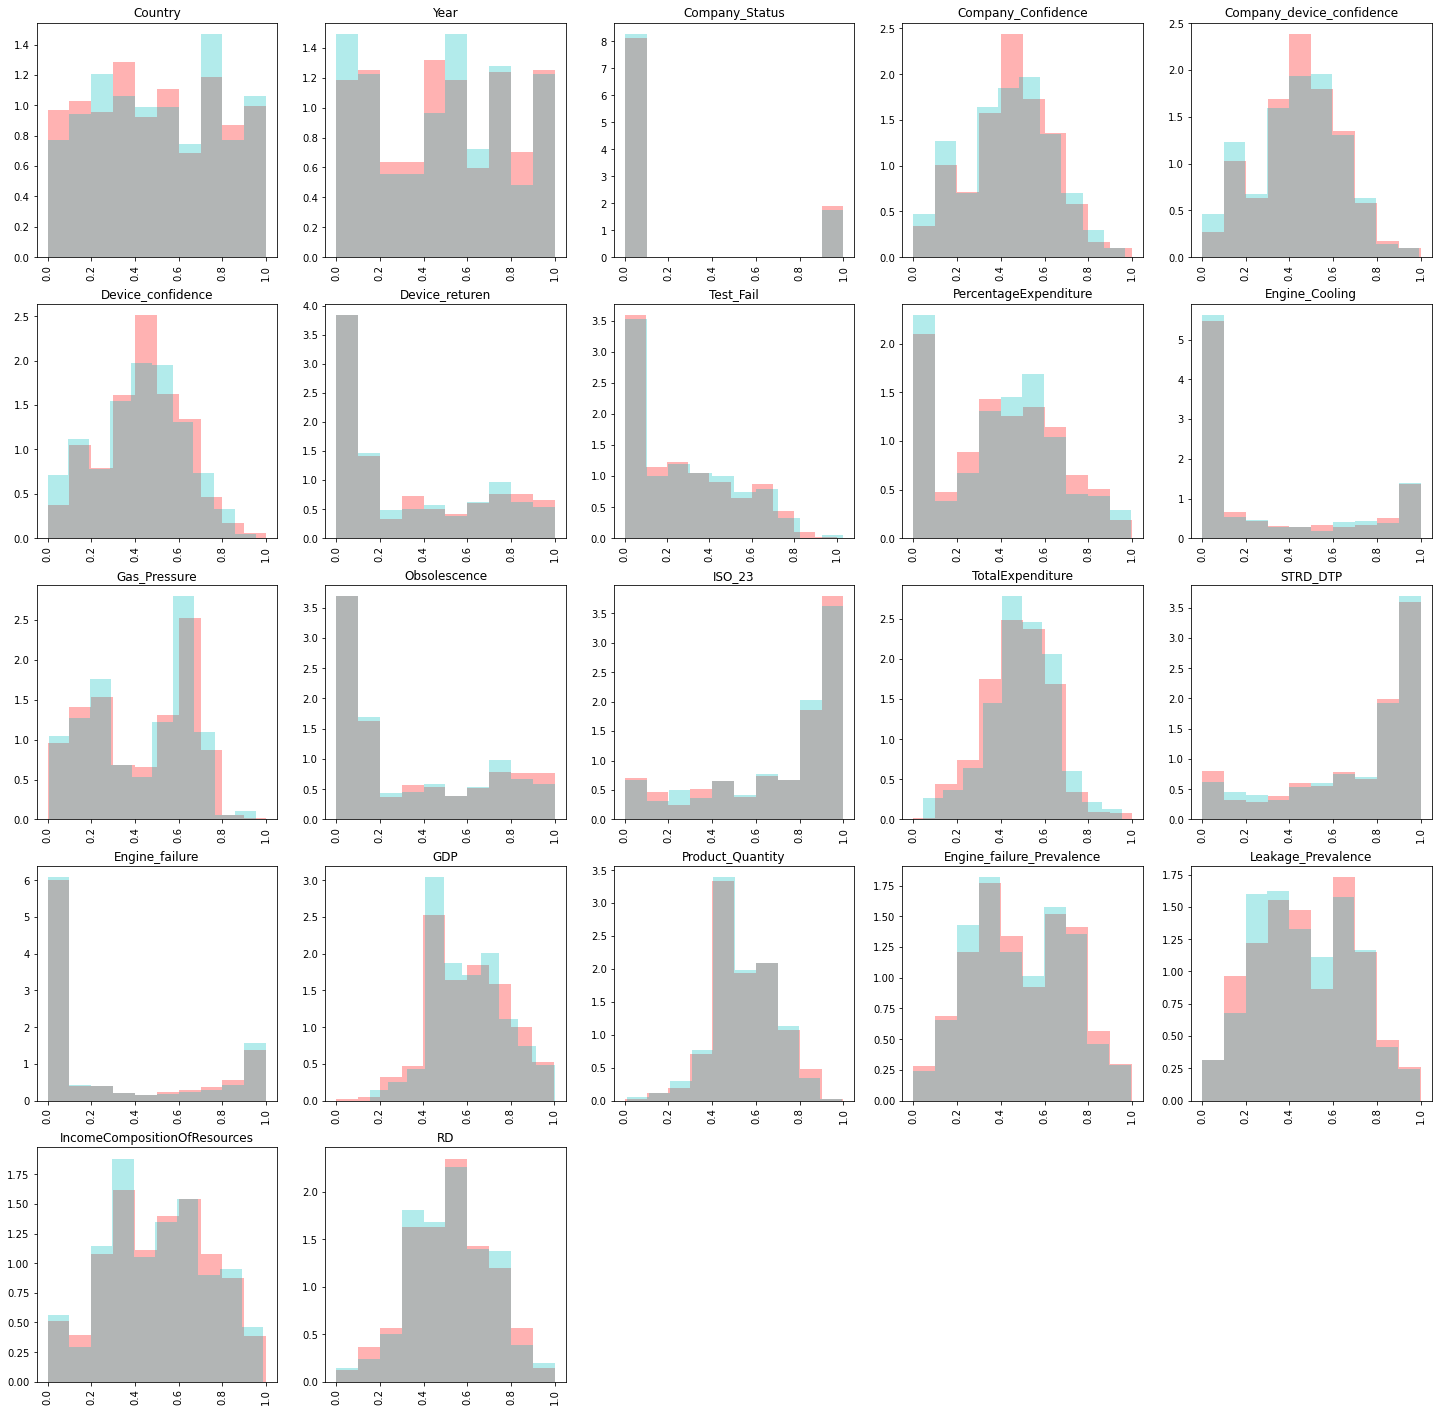

In [22]:
# Create histogram to check if data scaled correctly
plt.figure(figsize=(25,25))
for i, col in enumerate(df_X_training_scaled.columns):
    plt.subplot(5,5,i+1)
    plt.hist(df_X_training_scaled[col], alpha=0.3, color='r', density=True)
    plt.hist(df_X_testing_scaled[col], alpha=0.3, color='c', density=True)
    plt.title(col)
    plt.xticks(rotation='vertical')

From the above `Histogram` Plots, it can be concluded that:

- The distribution of train set attributes is approximately equal to the distribution of test set attributes

This means that our dataset has split correctly and is now ready to be used in our Machine Learning Model.

### Model Development Process:


The Model Development Process involves selecting the appropriate model, fitting the data, and evaluating the performance of the model. 

In this process, the data that has been pre-processed earlier based on the results from our EDA, is ready to be fit into various models to make predictions. The main objective of this process is to find a model that can accurately predict the target variable on new, unseen data.

We start off with,

#### Choosing a Baseline Model:-

Choosing a Baseline model sets a benchmark for the model's performance. 

It helps in identifying the gap between the model's performance and the desired performance level.

To make things easier for us and not test each of the different Regression models one-by-one to find the best Baseline model, we can instead:

- Define various Regression models through a Pipeline:

       A Pipeline is used to simplify the model development process and ensure consistency in 
       data preprocessing and model fitting. Pipelines allow us to chain multiple data processing and 
       model building steps together into a single object, making it easier to apply the same set of 
       steps to both the training and testing data. Additionally, pipelines can help prevent 
       data leakage by ensuring that all data processing steps are applied to the training data 
       before it is used to fit the model, preventing any information from the testing data from 
       influencing the model's performance.
       
- We then proceed to use K-Fold Cross Validation to evaluate the performance of our various models:

       The basic idea behind k-fold cross-validation is to split the dataset into k smaller sets, 
       or folds, and then use k-1 of these folds as the training set and the remaining fold as the 
       validation set. This process is repeated k times, with each of the k folds used exactly once 
       as the validation data. By doing this, we can get a more accurate estimate of the model's 
       performance, since each fold is used as both training and validation data. Additionally, by 
       repeating the process multiple times with different folds, we can get a more robust estimate 
       of the model's performance.
        
        
- Finally, the results from the K-Fold Cross Validation are analyzed and the best Baseline model is selected.

Based on the results of the EDA, we have selected the following models:

- Linear Regression:

        Linear regression is a simple and widely-used regression model that works well
        when there is a linear relationship between the independent variables and the 
        dependent variable. It is easy to interpret and can be used to make predictions 
        within the range of the training data. However, it assumes a linear relationship 
        and may not work well for nonlinear data.

- Polynomial Regression: 

        Polynomial regression is an extension of linear regression that allows for a nonlinear 
        relationship between the independent variables and the dependent variable. It works well
        when there is a curvilinear relationship between the variables, and can capture more 
        complex patterns in the data than linear regression. However, it can be prone to 
        overfitting and may not generalize well to new data.

- Random Forest Regression:

        Random forest regression is a machine learning algorithm that uses multiple decision 
        trees to make predictions. It works well when there are multiple features or predictors, 
        and can handle both linear and nonlinear relationships between the variables. It is also 
        less prone to overfitting than polynomial regression, making it a good choice for high-dimensional data.

- Decision Tree Regression:

        Decision tree regression is a simple and interpretable machine learning algorithm that 
        works by recursively partitioning the data into smaller subsets based on the predictor 
        variables. It works well when there are clear nonlinear relationships between the variables 
        and can handle both continuous and categorical data. However, it can be prone to overfitting and 
        may not generalize well to new data.

In [23]:
# Define k-fold cross-validation
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=21)

# Define candidate models to evaluate
models = [
    Pipeline([
#         ("scaling_features", ct),
        ('poly', PolynomialFeatures(degree=2)),
        ('reg', LinearRegression())
    ]),
    Pipeline([
#         ("scaling_features", ct),
        ('reg', LinearRegression())
    ]),
    Pipeline([
#         ("scaling_features", ct),
        ('reg', DecisionTreeRegressor())
    ]),    
    Pipeline([
#         ("scaling_features", ct),
        ('reg', RandomForestRegressor(max_depth=20, random_state=42))
    ])
]

# Evaluate models using k-fold cross-validation
for i, model in enumerate(models):
    print(f"Model {i+1}")
    mse_scores = []
    r2_scores = []
    for train_index, val_index in kf.split(df_X_training_scaled):
        X_train, y_train = df_X_training_scaled.iloc[train_index], df_Y_training.iloc[train_index]
        X_val, y_val = df_X_training_scaled.iloc[val_index], df_Y_training.iloc[val_index]
        
        # Fit the model only on the training set of the current fold
        model.fit(X_train, y_train)
        
        # Evaluate the model on the validation set of the current fold
        y_pred = model.predict(X_val)
        mse_scores.append(mean_squared_error(y_val, y_pred, squared=False))
        r2_scores.append(r2_score(y_val, y_pred))
        
    print(f"MSE: {np.mean(mse_scores):.2f} +/- {np.std(mse_scores):.2f}")
    print(f"R2: {np.mean(r2_scores):.2f} +/- {np.std(r2_scores):.2f}")

 # Fit the model on the entire training set
    model.fit(df_X_training_scaled, df_Y_training)
    
    # Evaluate the model on the testing set
    y_pred_test = model.predict(df_X_testing_scaled)
    mse_test = mean_squared_error(df_Y_testing, y_pred_test, squared=False)
    r2_test = r2_score(df_Y_testing, y_pred_test)
    print(f"Testing Set MSE: {mse_test:.2f}")
    print(f"Testing Set R2: {r2_test:.2f}")
    
    # Evaluate the model on the full training set
    y_pred_train = model.predict(df_X_training_scaled)
    mse_train = mean_squared_error(df_Y_training, y_pred_train, squared=False)
    r2_train = r2_score(df_Y_training, y_pred_train)
    print(f"Full Training Set MSE: {mse_train:.2f}")
    print(f"Full Training Set R2: {r2_train:.2f}")
    
    # Calculate generalization gap
    generalization_gap = mse_test - mse_train
    print(f"Generalization Gap: {generalization_gap:.2f}")
    print()

Model 1
MSE: 3.82 +/- 0.30
R2: 0.84 +/- 0.02
Testing Set MSE: 3.42
Testing Set R2: 0.87
Full Training Set MSE: 2.88
Full Training Set R2: 0.91
Generalization Gap: 0.54

Model 2
MSE: 4.43 +/- 0.30
R2: 0.78 +/- 0.02
Testing Set MSE: 4.42
Testing Set R2: 0.78
Full Training Set MSE: 4.37
Full Training Set R2: 0.79
Generalization Gap: 0.05

Model 3
MSE: 4.23 +/- 0.20
R2: 0.80 +/- 0.02
Testing Set MSE: 4.36
Testing Set R2: 0.79
Full Training Set MSE: 0.00
Full Training Set R2: 1.00
Generalization Gap: 4.36

Model 4
MSE: 3.05 +/- 0.15
R2: 0.90 +/- 0.01
Testing Set MSE: 2.87
Testing Set R2: 0.91
Full Training Set MSE: 1.12
Full Training Set R2: 0.99
Generalization Gap: 1.74



The above performs cross-validation on four different pipelines, we have compared the performance of Polynomial Multivariate Regression, Linear Regression, Decision Trees, and Random Forest Regression models.

The evaluation metrics used were R^2 Score, RMSE and Generalization Gap, all of which will be discussed later in the report.

Based on our EDA, we observed that the relationships between the predictor variables and target variable are non-linear. This is confirmed by the results obtained from the models. The Polynomial Multivariate Regression and Random Forest Regression models outperformed the Linear Regression model in terms of their R2 and MSE scores. 

The `Random Forest Regression model` was chosen as the best model for our `Baseline` due to its lowest test MSE and highest test R2, as well as its superior performance on the full training data compared to the other models. The generalization gap for this model was relatively high, indicating that there may be some `overfitting`, but this was deemed acceptable given the strong performance on the test data. 

Overall, these results demonstrate the importance of considering non-linear relationships in the data when choosing a regression model.

### Baseline Model:

After conducting a thorough analysis of the data and comparing the results from four different pipelines, it was found that Random Forest Regression performed the best among the other three models (Polynomial Multivariate Regression, Linear Regression and Decision Tree Regression). The Random Forest Regression model had the lowest test MSE of 2.87 and the highest test R2 of 0.91. Additionally, the full training MSE and R2 values were 1.12 and 0.99 respectively, indicating that the model was able to learn the training data very well.

The high generalization gap value of 1.74 suggests that the model may not perform as well on new and unseen data. However, this was expected as the model was trained on a limited amount of data and may not be able to capture all the intricacies of the real-world scenario. We have used further advanced techniques later in the report to try and minimise this gap.

This choice of Random Forest Regression as the baseline model is also in line with the results from the Exploratory Data Analysis (EDA), which revealed non-linear relationships between the variables. Random Forest Regression is known to perform well with non-linear data and can handle complex relationships between the variables.

Therefore, based on the above analysis and results, it can be concluded that Random Forest Regression is the best model for this particular dataset and can be used as a baseline model for further analysis and modeling.

In [24]:
pipeline = Pipeline([
        ('reg', RandomForestRegressor(max_depth=20, random_state=42))
    ])

pipeline.fit(df_X_training_scaled, df_Y_training)


# Evaluate the model on the testing set
y_pred_test = model.predict(df_X_testing_scaled)
mse_test = mean_squared_error(df_Y_testing, y_pred_test, squared=False)
r2_test = r2_score(df_Y_testing, y_pred_test)

# Evaluate the model on the full training set
y_pred_train = model.predict(df_X_training_scaled)
mse_train = mean_squared_error(df_Y_training, y_pred_train, squared=False)
r2_train = r2_score(df_Y_training, y_pred_train)

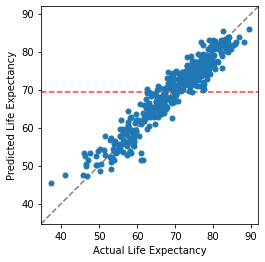

In [25]:
fig, ax = plt.subplots()
ax.scatter(df_Y_testing, y_pred_test, s=25, cmap=plt.cm.coolwarm, zorder=10)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

ax.plot(lims, lims, 'k--', alpha=0.5, zorder=0)
ax.plot(lims, [np.mean(df_Y_training),]*2, 'r--', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')

plt.show()

In [26]:
r2_lr = r2_score(df_Y_testing, y_pred_test)
print('The R^2 score for the linier regression model is: {:.3f}'.format(r2_lr))

The R^2 score for the linier regression model is: 0.909


In [27]:
mse = mean_squared_error(df_Y_testing, y_pred_test, squared=False)

print("Mean Squared Error:", mse)

Mean Squared Error: 2.866356710337792


In [28]:
# Calculate generalization gap
generalization_gap = mse_test - mse_train
print(f"Generalization Gap: {generalization_gap:.2f}")

Generalization Gap: 1.74


Our chosen baseline model has a generalization gap of about 1.74, which is quite high. It could mean that the model has become overfitted to the training data and may not generalize well to new, unseen data as seen by the difference in their RMSE scores. 

The first approach we can use to try and improve the model is:

#### Regularization:-

Regularization is a technique used to prevent overfitting in machine learning models. It works by adding a penalty term to the model's loss function, which helps to prevent the model from overfitting the training data. Regularization can be applied to various types of machine learning models, including linear regression, polynomial regression, and in our case, the random forest regression model.

In the case of our Random Forest Regression model, regularization is very helpful as we are experiencing some overfitting in the data, as observed from the big generalization gap.

Regularization can be achieved by limiting the depth of the trees, reducing the number of trees in the forest, or by setting a minimum sample size for each leaf node. By doing this, we are simplifying the model and making it less likely to fit the noise in the data. In our case, since we have observed overfitting in our baseline Random Forest Regression model, so we will apply regularization techniques such as:

- Maximum depth of the trees: This parameter specifies the maximum depth of the decision trees in the random forest. Limiting the depth of the trees can help avoid overfitting.

- Minimum number of samples required to split a node: This parameter specifies the minimum number of samples required to split a node. Increasing this value can help avoid overfitting.

- Minimum number of samples required at each leaf node: This parameter specifies the minimum number of samples required to be at each leaf node. Increasing this value can help avoid overfitting.

- Maximum number of features to consider for each split: This parameter specifies the maximum number of features to consider for each split. Setting a lower value for this parameter can help avoid overfitting.

- Bootstrapping: This parameter specifies whether or not to use bootstrapping when building the decision trees in the random forest. Bootstrapping is a technique that involves randomly sampling the data with replacement. Setting this parameter to "False" can help avoid overfitting.

We will now conduct some Hyperparameter Tuning for the above mentioned Hyperparameters to try and find ideal values for them:

#### Hyperparameter Tuning:-


Hyperparameter tuning is conducted in Random Forest Regression to improve the performance of the model by finding the optimal combination of hyperparameters. Random Forest Regression has several hyperparameters that can be tuned to improve the model's performance, such as the ones mentioned above. Two Additional Hyperparameters include: 
- Feature importance threshold: This parameter specifies a threshold for feature importance. Features with importance below this threshold are pruned from the model. Setting this threshold can help improve model performance by reducing the number of features used in the model.


- Number of trees in the forest: This parameter specifies the number of decision trees to be used in the random forest. Increasing the number of trees can improve the performance of the model but can also lead to overfitting.


By tuning these hyperparameters, we can find the best combination that optimizes the performance of the model on the given dataset. Hyperparameter tuning can help to prevent overfitting of the model, which can improve its ability to generalize to new, unseen data.

In [30]:
rf_pipeline = Pipeline([
    ('model', RandomForestRegressor())
])

param_grid = {
    'model__n_estimators': [50, 100],  # number of trees
    'model__max_depth': [5,6],  # maximum depth of trees
    'model__min_samples_split': [3,4],  # minimum number of samples to split a node
    'model__min_samples_leaf': [6,7],  # minimum number of samples at each leaf node
    'model__max_features': ['auto', 'sqrt'],  # maximum number of features to consider for each split
    'model__bootstrap': [True, False],  # whether or not to use bootstrapping
    'model__min_impurity_decrease': [0.0, 0.1],  # feature importance threshold
}

# Define the grid search object with the pipeline and hyperparameter grid
grid_search = GridSearchCV(rf_pipeline, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the grid search object to the training data
grid_search.fit(df_X_training_scaled, df_Y_training)

# Print the best hyperparameters and corresponding model performance
print("Best hyperparameters: ", grid_search.best_params_)
print("Best model performance: ", grid_search.best_score_)

# Obtain the best estimator found by the grid search
best_estimator = grid_search.best_estimator_

# Use the best estimator to make predictions on the test data
y_pred_test = best_estimator.predict(df_X_testing_scaled)

# Calculate the mean squared error on the test data
mse_test = mean_squared_error(df_Y_testing, y_pred_test, squared = False)

print("TEST MSE:", mse_test)

# Use the best estimator to make predictions on the training data
y_pred_train = best_estimator.predict(df_X_training_scaled)

# Calculate the mean squared error on the training data
mse_train = mean_squared_error(df_Y_training, y_pred_train, squared = False)

print("TRAIN MSE:", mse_train)

# Calculate the generalization gap
generalization_gap = mse_test - mse_train

print("Generalization gap: ", generalization_gap)

Best hyperparameters:  {'model__bootstrap': False, 'model__max_depth': 6, 'model__max_features': 'sqrt', 'model__min_impurity_decrease': 0.0, 'model__min_samples_leaf': 6, 'model__min_samples_split': 3, 'model__n_estimators': 100}
Best model performance:  0.8852476552216361
TEST MSE: 3.293375953870379
TRAIN MSE: 2.700082980009717
Generalization gap:  0.5932929738606618


The results of a GridSearch can be summarized as follows:

- Best hyperparameters: the combination of hyperparameters that gave the best cross-validated performance during the GridSearch. In this case, the best hyperparameters are a combination of the following values: 'model__bootstrap': False, 'model__max_depth': 6, 'model__max_features': 'sqrt', 'model__min_impurity_decrease': 0.0, 'model__min_samples_leaf': 6, 'model__min_samples_split': 3, and 'model__n_estimators': 100.


- Best model performance: the mean cross-validated score (in this case, using generalization_gap_scorer) of the best model found during the GridSearch. In this case, the best model had a mean cross-validated score of 0.8863.


- TEST MSE: the mean squared error of the best model on the test set. In this case, the mean squared error on the test set is 3.2.


- TRAIN MSE: the mean squared error of the best model on the training set. In this case, the mean squared error on the training set is 2.7.


- Generalization gap: the difference between the test and training mean squared errors. This is an indicator of how well the model generalizes to new data. In this case, the generalization gap is 0.59, which suggests that the model may be slightly overfitting to the training data.

Overall, these results indicate that the model with the specified hyperparameters is performing very well, with a relatively low mean squared error on both the training and test sets compared to the previous gap of 1.74.

This means that Regularization and Hyperparameter Tuning has worked correctly to rectify the issue of overfitting in my data.

#### Performance Analysis:-



In [31]:
# Define k-fold cross-validation
k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=21)

# Define candidate models to evaluate
models = Pipeline([
#         ("scaling_features", ct),
        ('reg', RandomForestRegressor(bootstrap= False, max_depth= 6, max_features= 'sqrt', 
                                      min_impurity_decrease= 0.0, 
                                      min_samples_leaf= 6, 
                                      min_samples_split= 3, n_estimators= 100, random_state=42))
    ])


# Evaluate models using k-fold cross-validation
for i, model in enumerate(models):
    print(f"Model {i+1}")
    mse_scores = []
    r2_scores = []
    for train_index, val_index in kf.split(df_X_training_scaled):
        X_train, y_train = df_X_training_scaled.iloc[train_index], df_Y_training.iloc[train_index]
        X_val, y_val = df_X_training_scaled.iloc[val_index], df_Y_training.iloc[val_index]
        
        # Fit the model only on the training set of the current fold
        model.fit(X_train, y_train)
        
        # Evaluate the model on the validation set of the current fold
        y_pred = model.predict(X_val)
        mse_scores.append(mean_squared_error(y_val, y_pred, squared=False))
        r2_scores.append(r2_score(y_val, y_pred))
        
    print(f"MSE: {np.mean(mse_scores):.2f} +/- {np.std(mse_scores):.2f}")
    print(f"R2: {np.mean(r2_scores):.2f} +/- {np.std(r2_scores):.2f}")
    
 # Fit the model on the entire training set
    model.fit(df_X_training_scaled, df_Y_training)
    
    # Evaluate the model on the testing set
    y_pred_test = model.predict(df_X_testing_scaled)
    mse_test = mean_squared_error(df_Y_testing, y_pred_test, squared=False)
    r2_test = r2_score(df_Y_testing, y_pred_test)
    print(f"Test MSE: {mse_test:.2f}")
    print(f"Test R2: {r2_test:.2f}")
    
    # Evaluate the model on the full training set
    y_pred_train = model.predict(df_X_training_scaled)
    mse_train = mean_squared_error(df_Y_training, y_pred_train, squared=False)
    r2_train = r2_score(df_Y_training, y_pred_train)
    print(f"Full Training MSE: {mse_train:.2f}")
    print(f"Full Training R2: {r2_train:.2f}")
    
    # Calculate generalization gap
    generalization_gap = mse_test - mse_train
    print(f"Generalization Gap: {generalization_gap:.2f}")

Model 1
MSE: 3.18 +/- 0.21
R2: 0.89 +/- 0.01
Test MSE: 3.27
Test R2: 0.88
Full Training MSE: 2.71
Full Training R2: 0.92
Generalization Gap: 0.56


We can conclude that the model performs well in predicting the target variable with a mean squared error (MSE) of 3.18 +/- 0.21 and a coefficient of determination (R2) of 0.89 +/- 0.01. The test MSE of 3.27 and test R2 of 0.88 indicates that the model can generalize well to new data. The full training MSE of 2.71 and full training R2 of 0.92 shows that the model is able to fit the training data well.

#### Evaluation Method:

RMSE and R^2 Score are commonly used evaluation metrics for regression models, including Linear Regression, Polynomial Multivariate Regression, and Random Forest Regressor.

Root Mean Squared Error (RMSE) is a measure of the average distance between the predicted values and the actual values. RMSE penalizes large errors more than small errors and is therefore a good metric for regression models where the goal is to minimize the distance between predicted and actual values. RMSE is expressed in the same units as the response variable, which makes it easy to interpret.

R^2 Score, also known as the coefficient of determination, is another commonly used metric for regression models. It measures the proportion of the variance in the dependent variable that is explained by the independent variables. R^2 Score ranges from 0 to 1, with a value of 1 indicating a perfect fit and a value of 0 indicating that the model does not explain any of the variance in the dependent variable.

Generalization gap is the difference between the test error and training error of a model. A small generalization gap indicates that the model is not overfitting or underfitting, and is able to generalize well to new data. Generalization gap is a useful metric for evaluating the performance of a model in terms of its ability to generalize to new data.

In summary, RMSE and R^2 Score are good evaluation metrics for regression models as they measure the accuracy and goodness of fit of the model, respectively. Generalization gap is also a useful metric for evaluating the performance of a model in terms of its ability to generalize to new data.

While there are other evaluation metrics available for regression problems, such as MAE (Mean Absolute Error), MSE (Mean Squared Error), and MAPE (Mean Absolute Percentage Error), RMSE and R^2 Score are often preferred because they are easy to interpret, widely used in the literature, and provide a good balance between accuracy and interpretability. Generalization gap is also an important metric to consider as it provides insight into the model's ability to generalize to new, unseen data.

### Ultimate Judgment:-

In conclusion, our Random Forest Regression model with regularization has shown promising results in predicting our target variable. The model has met our assumptions of the non-linearity of the data relationships, which makes it more suitable than linear regression or polynomial multivariate regression. Random Forest Regression is a powerful ensemble learning method that can capture non-linear relationships and interactions between variables, making it a suitable choice for our problem.

Our model achieved an average MSE of3.18 +/- 0.21 and an R2 score of 0.89 +/- 0.01 during cross-validation, indicating good overall performance. Furthermore, the generalization gap of 0.56 suggests that our model generalizes well to new, unseen data.

On the test set, the model achieved a test MSE of 3.27 and a test R2 score of 0.88, demonstrating that it can make accurate predictions on new data. Finally, the full training set's MSE of 2.71 and R2 score of 0.92 suggest that our model is not overfitting to the training data.



#### Real World Applications and Limitations:

The effectiveness of a Random Forest Regression model in a real-world setting depends on various factors such as the quality of the data, the relevance of the features, and the size of the dataset. However, in general, Random Forest Regression has proven to be a powerful technique for solving a wide range of regression problems in various industries, including finance, healthcare, and e-commerce.

One advantage of Random Forest Regression is its ability to capture non-linear relationships between the features and the target variable, which is often the case in real-world scenarios. Additionally, it can handle high-dimensional datasets with a large number of features and can effectively deal with missing values and outliers.

While Random Forest Regression with regularization is a powerful model for prediction tasks, it still has some limitations that need to be considered. One limitation is that it can be a black-box model, meaning that it may be difficult to interpret and understand the underlying relationships between the predictors and the target variable. Additionally, Random Forest models can be computationally expensive and may require significant resources to train, especially for large datasets with many features.

Another limitation is that the model assumes that the predictors are independent of each other, which may not be the case in real-world scenarios. The model may also suffer from overfitting if the number of trees in the forest is too high, leading to a decrease in its generalization performance.

Furthermore, the model's performance may depend on the quality of the input data. If the data is noisy or has missing values, the model may produce unreliable results. Finally, while Random Forest Regression can handle a wide range of data types, it may not be suitable for data with high dimensionality or sparsity.

It might be the fact that the dataset given to us for this report was already Accurate and Clean, which might have been one of the deciding factors on why the Random Forest Regressor Performs well.

Overall, Random Forest Regressor has worked well for our dataset and is a powerful Regression Model.

In [32]:
print(df_Y_testing.dtype)

float64


In [33]:
ids = list(range(1, len(y_pred_test) + 1))

# create a dataframe with the IDs and predicted values
df_predicted = pd.DataFrame({'ID': ids, 'Predicted_Value': y_pred_test})

# save the dataframe to a csv file
df_predicted.to_csv('sample_solution.csv', index=False)

### References:

- Scikit-Learn documentation: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
- Machine Learning Mastery article: https://machinelearningmastery.com/random-forest-ensemble-in-python/
- Official Random Forest Regression paper: https://www.stat.berkeley.edu/~breiman/randomforest2001.pdf
- Alavi, A. RMIT COSC2673/2793 Machine Learning: https://bitbucket.org/alavi_a/rmit_cosc_2673_2793-2310/src/master/